x (100, 2) y (100,)


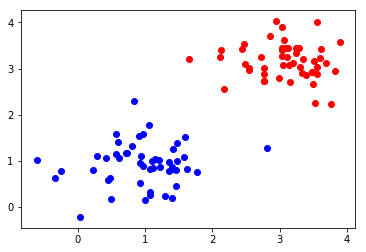

In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

DIM = 2
COLORS = ['red', 'blue']

# 2-D mean of ones
M1 = np.ones((DIM,))
# 2-D mean of threes
M2 = 3 * np.ones((DIM,))
# 2-D covariance of 0.3
C1 = np.diag(0.3 * np.ones((DIM,)))
# 2-D covariance of 0.2
C2 = np.diag(0.2 * np.ones((DIM,)))

def generate_gaussian(m, c, num):
    return np.random.multivariate_normal(m, c, num)

def plot_data_with_labels(x, y):
    unique = np.unique(y)
    for li in range(len(unique)):
        x_sub = x[y == unique[li]]
        plt.scatter(x_sub[:, 0], x_sub[:, 1], c = COLORS[li])
    plt.show()

NUM = 50
if __name__ == '__main__':
    # generate 50 points from gaussian 1
    x1 = generate_gaussian(M1, C1, NUM)
    # labels
    y1 = np.ones((x1.shape[0],))
    # generate 50 points from gaussian 2
    x2 = generate_gaussian(M2, C2, NUM)
    y2 = -np.ones((x2.shape[0],))
    # join
    x = np.concatenate((x1, x2), axis = 0)
    y = np.concatenate((y1, y2), axis = 0)
    print('x {} y {}'.format(x.shape, y.shape))
    plot_data_with_labels(x, y)
    # write
    with open('gaussiandata.pickle', 'wb') as f:
        pickle.dump((x, y), f)

In [4]:
def fit(x, y): 
    NUM = x.shape[0]
    DIM = x.shape[1]
    # we'll solve the dual
    # obtain the kernel
    K = y[:, None] * x
    K = np.dot(K, K.T)
    P = matrix(K)
    q = matrix(-np.ones((NUM, 1)))
    G = matrix(-np.eye(NUM))
    h = matrix(np.zeros(NUM))
    A = matrix(y.reshape(1, -1))
    b = matrix(np.zeros(1))
    solvers.options['show_progress'] = False
    sol = solvers.qp(P, q, G, h, A, b)
    alphas = np.array(sol['x'])
    return alphas

In [5]:
# fit svm classifier
alphas = fit(x, y)

# get weights
w = np.sum(alphas * y[:, None] * x, axis = 0)
# get bias
cond = (alphas > 1e-4).reshape(-1)
b = y[cond] - np.dot(x[cond], w)
bias = b[0]

NameError: name 'matrix' is not defined

In [10]:
def plot_separator(ax, w, b): 
    slope = -w[0] / w[1]
    intercept = -b / w[1]
    x = np.arange(0, 6)
    ax.plot(x, x * slope + intercept, 'k-')

In [16]:

import ast
import time
import re

from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.cross_validation import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import svm

%matplotlib inline

C:\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


AttributeError: module 'sklearn.svm' has no attribute 'svm'

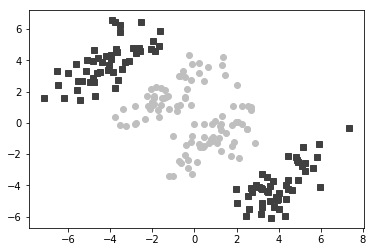

In [17]:
import numpy as np
import pylab as pl
from sklearn import svm

# Make some 2D data
linsep = False
overlap = True

if linsep:
	# Case 1: Linearly separable
	if overlap:
		cov = [[2.0,1.0],[1.0,2.0]]
	else:
		cov = [[0.8,0.6],[0.6,0.8]]

	train0 = np.random.multivariate_normal([0.,2.], cov, 100)
	train1 = np.random.multivariate_normal([2.,0.], cov, 100)
	train = np.concatenate((train0,train1),axis=0)
	test0 = np.random.multivariate_normal([0.,2.], cov, 20)
	test1 = np.random.multivariate_normal([2.,0.], cov, 20)
	test = np.concatenate((test0,test1),axis=0)

	labeltrain0 = np.ones((np.shape(train0)[0],1))
	labeltrain1 = -np.ones((np.shape(train1)[0],1))
	labeltrain = np.concatenate((labeltrain0,labeltrain1),axis=0)
	labeltest0 = np.ones((np.shape(test0)[0],1))
	labeltest1 = -np.ones((np.shape(test1)[0],1))
	labeltest = np.concatenate((labeltest0,labeltest1),axis=0)

else:
	# Case 2: Not linearly separable
	cov = [[1.5,1.0],[1.0,1.5]]
	train0a = np.random.multivariate_normal([-1.,2.], cov, 50)
	train0b = np.random.multivariate_normal([1.,-1.], cov, 50)
	train0 = np.concatenate((train0a,train0b),axis=0)
	train1a = np.random.multivariate_normal([4.,-4.], cov, 50)
	train1b = np.random.multivariate_normal([-4.,4.], cov, 50)
	train1 = np.concatenate((train1a,train1b),axis=0)
	train = np.concatenate((train0,train1),axis=0)

	test0a = np.random.multivariate_normal([-1.,2.], cov, 50)
	test0b = np.random.multivariate_normal([1.,-1.], cov, 50)
	test0 = np.concatenate((test0a,test0b),axis=0)
	test1a = np.random.multivariate_normal([4.,-4.], cov, 50)
	test1b = np.random.multivariate_normal([-4.,4.], cov, 50)
	test1 = np.concatenate((test1a,test1b),axis=0)
	test = np.concatenate((test0,test1),axis=0)

	labeltrain0 = np.ones((np.shape(train0)[0],1))
	labeltrain1 = -np.ones((np.shape(train1)[0],1))
	labeltrain = np.concatenate((labeltrain0,labeltrain1),axis=0)
	labeltest0 = np.ones((np.shape(test0)[0],1))
	labeltest1 = -np.ones((np.shape(test1)[0],1))
	labeltest = np.concatenate((labeltest0,labeltest1),axis=0)

pl.figure()
pl.plot(train0[:,0], train0[:,1], "o",color="0.75")
pl.plot(train1[:,0], train1[:,1], "s",color="0.25")

#import svm
#reload(svm)

svm = svm.svm(kernel='linear',C=0.1)
#svm = svm.svm(kernel='rbf')
#svm = svm.svm(kernel='poly',C=0.1,degree=4)

print (np.shape(train), np.shape(labeltrain))
svm.train_svm(train, labeltrain)
pl.scatter(svm.X[:,0], svm.X[:,1], s=200,color= 'k')

predict = svm.classifier(test,soft=False)
correct = np.sum(predict == labeltest)
print (correct, np.shape(predict))
print (float(correct)/np.shape(predict)[0]*100., "test accuracy")

# Classify points over 2D space to fit contour
x,y = np.meshgrid(np.linspace(-6,6,50), np.linspace(-6,6,50))
xx = np.reshape(np.ravel(x),(2500,1))
yy = np.reshape(np.ravel(y),(2500,1))
points = np.concatenate((xx,yy),axis=1)
outpoints = svm.classifier(points,soft=True).reshape(np.shape(x))
pl.contour(x, y, outpoints, [0.0], colors='k', linewidths=1, origin='lower')
pl.contour(x, y, outpoints + 1, [0.0], colors='grey', linewidths=1, origin='lower')
pl.contour(x, y, outpoints - 1, [0.0], colors='grey', linewidths=1, origin='lower')

pl.axis("tight")
pl.show()


#### SVM on WINE DATASET 

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.640000,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.380000,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.680000,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.800000,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.320000,1.04,2.93,735
5,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.750000,1.05,2.85,1450
6,1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.250000,1.02,3.58,1290
7,1,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.050000,1.06,3.58,1295
8,1,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.200000,1.08,2.85,1045
9,1,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.220000,1.01,3.55,1045


In [7]:
%matplotlib inline
import numpy as np
import scipy as sp
import pandas as pd
import sklearn
import seaborn as sns
from matplotlib import pyplot as plt

import sklearn.cross_validation

C:\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [31]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')
Y = df.quality.values
df=df.drop('quality', axis=1)
Y = np.asarray([1 if i>=7 else 0 for i in Y])
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [26]:
X = df.as_matrix()

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import cross_val_score

scores = []

for val in range(1,41):
    clf = RandomForestClassifier(n_estimators = val)
    validated = cross_val_score(clf, X, Y, cv=10)
    scores.append(validated)

ValueError: Found input variables with inconsistent numbers of samples: [178, 150]

In [28]:
clf1 = RandomForestClassifier(n_estimators=2)
validated = cross_val_score(clf1, X, Y, cv = 10)
validated

ValueError: Found input variables with inconsistent numbers of samples: [178, 150]

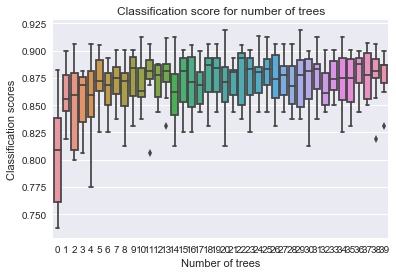

In [12]:
len_y = len(Y)
temp = [i for i in Y if i == 0]
temp_1 = temp.count(0)

percentage = float(temp_1)/float(len_y) * 100

sns.boxplot(data=scores)
plt.xlabel('Number of trees')
plt.ylabel('Classification scores')
plt.title('Classification score for number of trees')
plt.show()

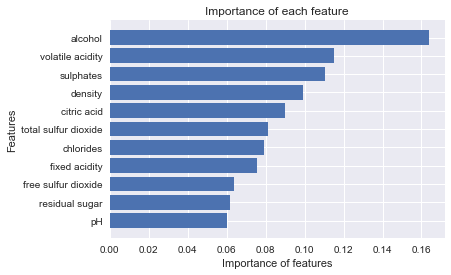

In [14]:
lf = RandomForestClassifier(n_estimators= 15)
clf.fit(X, Y)

imp = clf.feature_importances_
names = df.columns

imp, names = zip(*sorted(zip(imp, names)))

plt.barh(range(len(names)), imp, align = 'center')
plt.yticks(range(len(names)), names)

plt.xlabel('Importance of features')
plt.ylabel('Features')
plt.title('Importance of each feature')
plt.show()

In [15]:
from sklearn.tree import DecisionTreeClassifier
import sklearn.linear_model
import sklearn.svm

def plot_decision_surface(clf, X_train, Y_train):
    plot_step = 0.1
    if X_train.shape[1] != 2:
        raise ValueError("X_train should have exactly 2 columns!")

    x_min, x_max = X_train[:, 0].min() - plot_step, X_train[:, 0].max() + plot_step
    y_min, y_max = X_train[:, 1].min() - plot_step, X_train[:, 1].max() + plot_step
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                        np.arange(y_min, y_max, plot_step))

    clf.fit(X_train, Y_train)
    if hasattr(clf, 'predic_proba'):
        Z = clf.predic_proba(np.c_[xx.ravel(), yy.ravel()])[:,1]
    else:
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap = plt.cm.Reds)
    plt.scatter(X_train[:,0], X_train[:, 1], c = Y_train, cmap = plt.cm.Paired)
    plt.show()

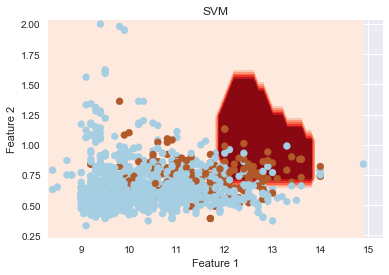

In [22]:
imp_fe = np.argsort(imp)[::-1][0:2]
X_imp = X[:, imp_fe]

algorithms = sklearn.svm.SVC(C = 100.0, gamma = 1)
title = 'SVM'

plt.title(title)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plot_decision_surface(algorithms, X_imp, Y)

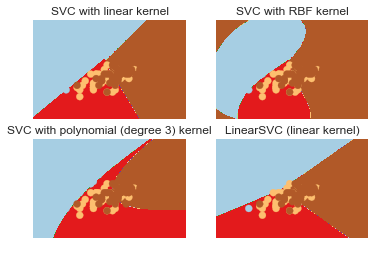

In [24]:
import numpy as np
import pylab as pl
from sklearn import svm, datasets

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features. We could
                      # avoid this ugly slicing by using a two-dim dataset
Y = iris.target

h = .02  # step size in the mesh

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
svc = svm.SVC(kernel='linear', C=C).fit(X, Y)
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X, Y)
poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(X, Y)
lin_svc = svm.LinearSVC(C=C).fit(X, Y)

# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# title for the plots
titles = ['SVC with linear kernel',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel',
          'LinearSVC (linear kernel)']


for i, clf in enumerate((svc, rbf_svc, poly_svc, lin_svc)):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    pl.subplot(2, 2, i + 1)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    pl.contourf(xx, yy, Z, cmap=pl.cm.Paired)
    pl.axis('off')

    # Plot also the training points
    pl.scatter(X[:, 0], X[:, 1], c=Y, cmap=pl.cm.Paired)

    pl.title(titles[i])

pl.show()

In [2]:
import numpy as np
import numpy.linalg as ln

classes = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

def sigmoid(u):
    return 1. / (1. + np.e ** -u)

def back_propagation(X, labels, m, regularization=True):
      """ Multilayer Neural Network
  input units:  4
  output units: 3
  :param X: d x n input matrix (d will be 4 for Iris)
  :param m: number of intermediate units
  """

    d, n = X.shape
    X = np.vstack((np.ones(n), X)).T # augumented; n x d+1

    # read label, and convert 3 unit format (001, 010, 100)
    b = -1 * np.ones((n, 3))
    for i in range(n):
        idx = classes.index(labels[i])
        b[i, idx] = 1.

    # weight matrix from input layer (d+1=3) to intermediate layer (m)
    W01 = np.random.randn(m, d+1)

    # weight matrix from intermediate layer (m) to output layer (3)
    W12 = np.random.randn(3, m)

    epoch = 0
    learning_rate = .01
    th = 1e-1
    l = .1 # lambda for regularization

    # learning
    while epoch < 10000:
        epoch += 1

    # compute output for n input data
    g10 = sigmoid(np.dot(X, W01.T)) # n x m
    g21 = sigmoid(np.dot(g10, W12.T)) # n x 3

    """ for debugging
    err = abs(b - (g21 * 2 - 1))
    print err < th, b[0], (g21 * 2 -1)[0]
    if epoch % 1000 == 0: print 'error:', sum(err), learning_rate
    # check convergence based on the threshold value
    # * NOT completely converge
    if (err < th).all(): break
    """

    # epsilon from output layer to intermediate layer
    # with converting 0, 1 output (g21) to -1, 1 output (same as b)
    e21 = ((g21 * 2 -1) - b) * g21 * (1. - g21) # n x 3

    # epsilon from intermediate layer to input layer
    e10 = np.dot(e21, W12) * g10 * (1. - g10) # n x m

    # adjust weights
    if regularization:
        W12 -= learning_rate * (np.dot(e21.T, g10) + (l * W12)) # 3 x m
        W01 -= learning_rate * (np.dot(e10.T, X) + (l * W01)) # m x d+1
    else:
        W12 -= learning_rate * np.dot(e21.T, g10) # 3 x m
        W01 -= learning_rate * np.dot(e10.T, X) # m x d+1

    return W01, W12

def cross_validation(X, labels, K, regularization=True):
    """5-fold cross validate of NN (back propagation)
  one fold has 30 tests and 120 trains
  X will be given as n x d matrix, and it will be passed to learning function as d x n matrix
  """

    total_accuracy = 0.

    idxs = range(150)
    np.random.shuffle(idxs)

    # 5-fold
    for n in range(5):
        head = 30 * n
        tail = 30 * (n + 1)
        test_idxs = idxs[head:tail]
        train_idxs = [idxs[i] for i in range(150) if (i < head or i >= tail)]

    W01, W12 = back_propagation(X[train_idxs].T, labels[train_idxs], K, regularization)

    # compute estimated class based on the result from NN
    g10 = sigmoid(np.dot(np.hstack((np.ones((30, 1)), X[test_idxs])), W01.T)) # n x m
    g21 = sigmoid(np.dot(g10, W12.T)) # n x 3

    # convert test labels -> 0, 1 arrays
    b = 0 * np.ones((30, 3))
    for i in range(30):
        idx = classes.index(labels[test_idxs[i]])
        b[i, idx] = 1.

    # compute accuracy
    result = np.round(g21)
    correct_cnt = 0
    for i in range(30):
        if (b[i] == result[i]).all(): correct_cnt += 1
    accuracy = float(correct_cnt) / 30
    total_accuracy += accuracy

    return total_accuracy / 5.

def main():
    X = []
    labels = []
    with open('iris.data') as f:
        lines = map(lambda l: l.rstrip().split(','), f.readlines())
    for line in lines:
        X.append(map(float, line[:4]))
        labels.append(line[4])

    X = np.asarray(X)
    labels = np.asarray(labels)

    print 'With regularization'
    for K in range(1, 11):
        accuracy = cross_validation(X, labels, K)
        print '[K = %2d] %f' % (K, accuracy)

    print '\nWithout regularization'
    for K in range(1, 11):
        accuracy = cross_validation(X, labels, K, False)
        print '[K = %2d] %f' % (K, accuracy)

if __name__ == '__main__':
    main()

IndentationError: unindent does not match any outer indentation level (<ipython-input-2-f7359256a6e9>, line 17)

In [10]:
import numpy as np
import numpy.linalg as ln
import pylab as pl
from sklearn import svm, datasets

iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features. We could
                      # avoid this ugly slicing by using a two-dim dataset
Y = iris.target
classes = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

def sigmoid(u):
  return 1. / (1. + np.e ** -u)

def back_propagation(X, labels, m, regularization=True):
  """Multilayer Neural Network
  input units:  4
  output units: 3
  :param X: d x n input matrix (d will be 4 for Iris)
  :param m: number of intermediate units
  """

  d, n = X.shape
  X = np.vstack((np.ones(n), X)).T # augumented; n x d+1

  # read label, and convert 3 unit format (001, 010, 100)
  b = -1 * np.ones((n, 3))
  for i in range(n):
    idx = classes.index(labels[i])
    b[i, idx] = 1.

  # weight matrix from input layer (d+1=3) to intermediate layer (m)
  W01 = np.random.randn(m, d+1)

  # weight matrix from intermediate layer (m) to output layer (3)
  W12 = np.random.randn(3, m)

  epoch = 0
  learning_rate = .01
  th = 1e-1
  l = .1 # lambda for regularization

  # learning
  while epoch < 10000:
    epoch += 1

    # compute output for n input data
    g10 = sigmoid(np.dot(X, W01.T)) # n x m
    g21 = sigmoid(np.dot(g10, W12.T)) # n x 3

    """ for debugging
    err = abs(b - (g21 * 2 - 1))
    print err < th, b[0], (g21 * 2 -1)[0]
    if epoch % 1000 == 0: print 'error:', sum(err), learning_rate
    # check convergence based on the threshold value
    # * NOT completely converge
    if (err < th).all(): break
    """

    # epsilon from output layer to intermediate layer
    # with converting 0, 1 output (g21) to -1, 1 output (same as b)
    e21 = ((g21 * 2 -1) - b) * g21 * (1. - g21) # n x 3

    # epsilon from intermediate layer to input layer
    e10 = np.dot(e21, W12) * g10 * (1. - g10) # n x m

    # adjust weights
    if regularization:
      W12 -= learning_rate * (np.dot(e21.T, g10) + (l * W12)) # 3 x m
      W01 -= learning_rate * (np.dot(e10.T, X) + (l * W01)) # m x d+1
    else:
      W12 -= learning_rate * np.dot(e21.T, g10) # 3 x m
      W01 -= learning_rate * np.dot(e10.T, X) # m x d+1

  return W01, W12

def cross_validation(X, labels, K, regularization=True):
  """5-fold cross validate of NN (back propagation)
  one fold has 30 tests and 120 trains
  X will be given as n x d matrix, and it will be passed to learning function as d x n matrix
  """

  total_accuracy = 0.

  idxs = range(150)
  np.random.shuffle(idxs)

  # 5-fold
  for n in range(5):
    head = 30 * n
    tail = 30 * (n + 1)
    test_idxs = idxs[head:tail]
    train_idxs = [idxs[i] for i in range(150) if (i < head or i >= tail)]

    W01, W12 = back_propagation(X[train_idxs].T, labels[train_idxs], K, regularization)

    # compute estimated class based on the result from NN
    g10 = sigmoid(np.dot(np.hstack((np.ones((30, 1)), X[test_idxs])), W01.T)) # n x m
    g21 = sigmoid(np.dot(g10, W12.T)) # n x 3

    # convert test labels -> 0, 1 arrays
    b = 0 * np.ones((30, 3))
    for i in range(30):
      idx = classes.index(labels[test_idxs[i]])
      b[i, idx] = 1.

    # compute accuracy
    result = np.round(g21)
    correct_cnt = 0
    for i in range(30):
      if (b[i] == result[i]).all(): correct_cnt += 1
    accuracy = float(correct_cnt) / 30
    total_accuracy += accuracy

  return total_accuracy / 5.

def main():
  X = []
  labels = []
  with open('iris.data') as f:
    lines = map(lambda l: l.rstrip().split(','), f.readlines())
    for line in lines:
      X.append(map(float, line[:4]))
      labels.append(line[4])

  X = np.asarray(X)
  labels = np.asarray(labels)

  print ('With regularization')
  for K in range(1, 11):
    accuracy = cross_validation(X, labels, K)
    print ('[K = %2d] %f' % (K, accuracy))

  print ('\nWithout regularization')
  for K in range(1, 11):
    accuracy = cross_validation(X, labels, K, False)
    print ('[K = %2d] %f' % (K, accuracy))

if __name__ == '__main__':
  main()

AttributeError: __enter__